In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('./Downloads/3.12. Example.csv')

In [5]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Text(0, 0.5, 'Loyalty')

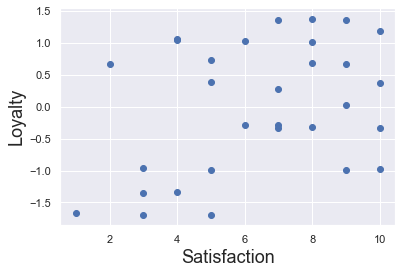

In [8]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction',size=18)
plt.ylabel('Loyalty',size=18)

In [9]:
x = data.copy()

In [11]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
cluster = x.copy()
cluster['cluster_pred'] = kmeans.fit_predict(x)
cluster

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,0
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,0
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,1
9,8,0.68,1


Text(0, 0.5, 'Loyalty')

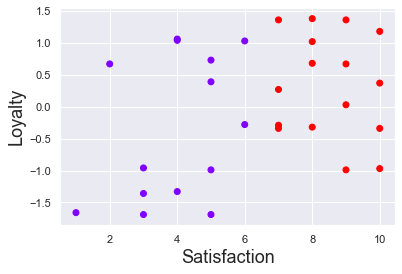

In [17]:
plt.scatter(cluster['Satisfaction'],cluster['Loyalty'],c=cluster['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction',size=18)
plt.ylabel('Loyalty',size=18)

In [18]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x) 

In [19]:
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [20]:
wcss=[]
for i in range(1,10):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_inertia = kmeans.inertia_
    wcss.append(wcss_inertia)
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.54983679159933,
 5.464232350204885,
 4.337110750237059,
 3.7078990061074406]

Text(0, 0.5, 'within cluster sum of squares')

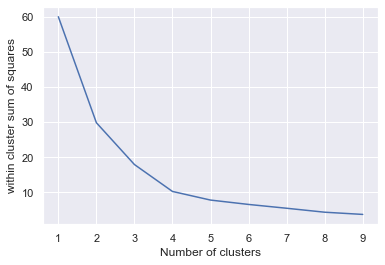

In [22]:
number_of_cluster = range(1,10)
plt.plot(number_of_cluster, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('within cluster sum of squares')

In [27]:
kmeans_new = KMeans(4) # Alienated,Supporter,Fans,Roamers
kmeans_new.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
cluster_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,2
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,3
9,8,0.68,3


Text(0, 0.5, 'Loyalty')

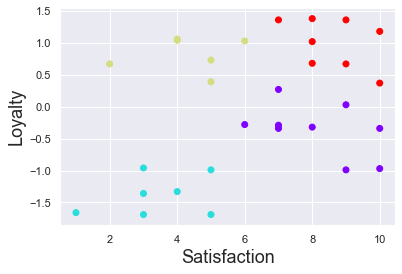

In [28]:
plt.scatter(cluster_new['Satisfaction'],cluster_new['Loyalty'],c=cluster_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction',size=18)
plt.ylabel('Loyalty',size=18)